# Plots used in the thesis

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.path as mpath
import numpy as np
import pandas as pd
import warnings
import os
from pathlib import Path

from quantform.pylib import QfDate
from quantform.pylib.equity.utils import form_option_id
from quantform.pylib.equity.derivative import Option
from quantform.pylib.equity.portfolio import GenericUnivariateStrategy
from quantform.pylib.surface import PriceSurface

warnings.filterwarnings("ignore")
plt.style.use('ggplot')
project_root = Path(os.path.abspath(""))

## Option price surface

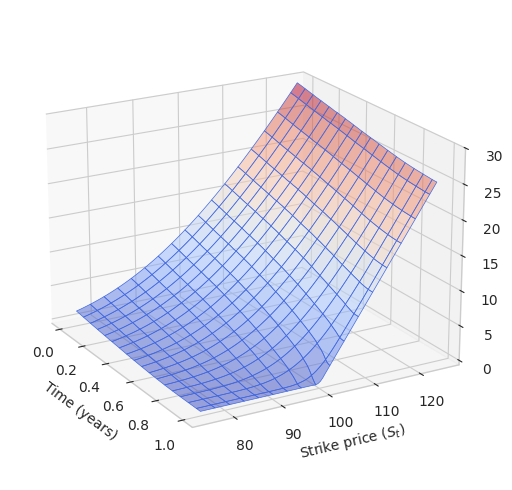

In [2]:
r = 0.02
s = 0.25

underlying = "AAPL"  # Arbitrary choice

T = QfDate(2025, 12, 31)

option = Option(form_option_id(underlying, T, "Call", 100), underlying, T, "Call", 100, r, s)

surf = PriceSurface(option, (50, 50), max_underlying_value=125, min_underlying_value=75)
plt.style.use("seaborn-v0_8-whitegrid")
# plt.style.use('ggplot')

fig = plt.figure(figsize=(7, 5))
ax  = plt.axes(projection = '3d')

surf.plot((100, 100), ((0, 1), (75, 125)), plot_heatmap=False, fig=fig, ax=ax, cmap_name="coolwarm", edgecolor='royalblue', lw=0.5, rstride=6, cstride=6, alpha=0.5)

ax.view_init(elev=20, azim=60)
ax.set_ylabel("Strike price ($S_t$)", fontsize=10)
ax.set_xlabel("Time (years)", fontsize=10)
ax.set_zlabel("Option value (USD)", fontsize=10)

ax.azim = 150
ax.dist = 30

fig.tight_layout()
fig.savefig(project_root / "figures" / "option_price_surface.pdf")

fig.show()

plt.style.use('ggplot')

## Breeden-Litzenberger example

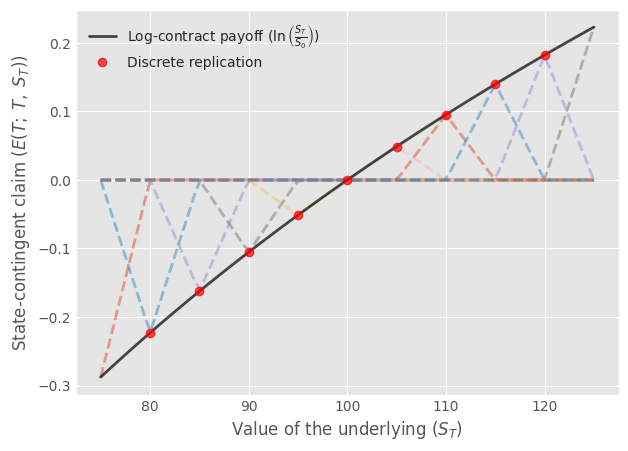

In [3]:
def func(x):
  return np.log(x / 100)

options = [Option(form_option_id(underlying, T, "Call", strike), underlying, T, "Call", strike, r, s) for strike in np.linspace(70, 130, 13)]

elementary_claims = [GenericUnivariateStrategy([options[i -1], options[i], options[i + 1]], [func(options[i].strike) / 5, -2 * func(options[i].strike) / 5, func(options[i].strike) / 5]) for i in range(1, len(options) - 1)]

fig = plt.figure(figsize=(7, 5))
xx = np.linspace(75, 125, 100)

for i, elementary_claim in enumerate(elementary_claims):
  plt.plot(xx, [elementary_claim(x, T) for x in xx], '--', alpha=0.5, linewidth=2)

plt.plot(xx, func(xx), 'k-', linewidth=2, alpha=0.7, label=r"Log-contract payoff ($\ln \left( \frac{S_T}{S_0} \right)$)")

discr_points = np.linspace(75, 125, 11)[1:-1]
discr_values = func(discr_points)

plt.plot(discr_points, discr_values, 'ro', label="Discrete replication", alpha=0.7)

plt.xlabel("Value of the underlying ($S_T$)")
plt.ylabel("State-contingent claim ($E(T;\; T, \; S_T))$")

plt.legend()

fig.savefig(project_root / "figures" / "breeden_litzenberger.pdf")

plt.show()


## Arbitrary boundary in (S_t, t) space

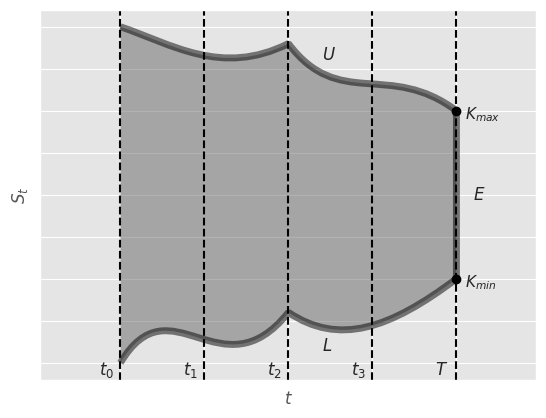

In [4]:
fig, ax = plt.subplots()

Path = mpath.Path
path_data = [
    (Path.MOVETO, (0, 2)),
    (Path.CURVE4, (0.3, 1.9)),
    (Path.CURVE4, (0.6, 1.7)),
    (Path.CURVE4, (1, 1.9)),
    (Path.CURVE4, (1.3, 1.5)),
    (Path.CURVE4, (1.6, 1.8)),
    (Path.CURVE4, (2, 1.5)),
    (Path.LINETO, (2, 0.5)),
    (Path.CURVE4, (1.6, 0.2)),
    (Path.CURVE4, (1.3, 0.1)),
    (Path.CURVE4, (1, 0.3)),
    (Path.CURVE4, (0.6, -0.2)),
    (Path.CURVE4, (0.3, 0.5)),
    (Path.CURVE4, (0, 0.0)),
    # (Path.CLOSEPOLY, (0, 2)),
    ]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, joinstyle='bevel', facecolor='0.4', edgecolor='k', linestyle='-', linewidth=5, alpha=0.5)
ax.add_patch(patch)

ax.axvline(2.0, color='black', linestyle='dashed')
ax.axvline(1.5, color='black', linestyle='dashed')
ax.axvline(1.0, color='black', linestyle='dashed')
ax.axvline(0.5, color='black', linestyle='dashed')
ax.axvline(0.0, color='black', linestyle='dashed')

ax.text(1.2, 1.8, "$U$", fontsize=12)
ax.text(1.2, 0.07, "$L$", fontsize=12)
ax.text(2.1, 0.97, "$E$", fontsize=12)

ax.text(-0.13, 0-0.07, "$t_0$", fontsize=12)
ax.text(0.5-0.13, 0-0.07, "$t_1$", fontsize=12)
ax.text(1.-0.13, 0-0.07, "$t_2$", fontsize=12)
ax.text(1.5-0.13, 0-0.07, "$t_3$", fontsize=12)
ax.text(2.-0.13, 0-0.07, "$T$", fontsize=12)

ax.plot(2, 1.5, 'ko')
ax.text(2.05, 1.45, "$K_{max}$", fontsize=11)

ax.plot(2, 0.5, 'ko')
ax.text(2.05, 0.45, "$K_{min}$", fontsize=11)


ax.axis('equal')
ax.set_ylabel("$S_t$")
ax.set_xlabel("$t$")
# ax.set_axis_off()

plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])

fig.savefig(project_root / "figures" / "arbitrary_boundary.pdf")

plt.show()


## Up-and-Out Call Option

### Boundary

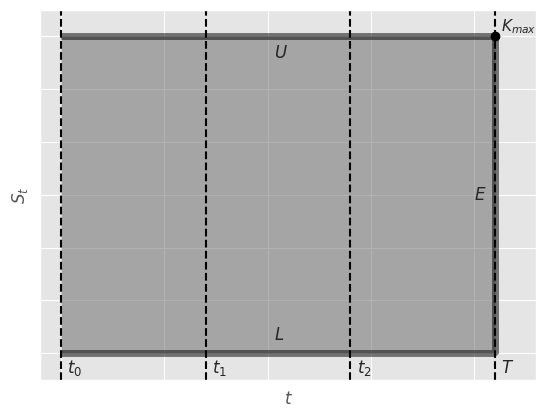

In [5]:
fig, ax = plt.subplots()

Path = mpath.Path
path_data = [
    (Path.MOVETO, (0, 120)),
    (Path.LINETO, (21, 120)),
    (Path.LINETO, (21, 0)),
    (Path.LINETO, (0, 0)),
    ]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, joinstyle='bevel', facecolor='0.4', edgecolor='k', linestyle='-', linewidth=5, alpha=0.5)
ax.add_patch(patch)

ax.axvline(0, color='black', linestyle='dashed')
ax.axvline(7, color='black', linestyle='dashed')
ax.axvline(14, color='black', linestyle='dashed')
ax.axvline(21, color='black', linestyle='dashed')


ax.text(0 + 0.3, -7.5, "$t_0$", fontsize=12)
ax.text(7 + 0.3, -7.5, "$t_1$", fontsize=12)
ax.text(14 + 0.3, -7.5, "$t_2$", fontsize=12)
ax.text(21 + 0.3, -7.5, "$T$", fontsize=12)

ax.text(10.3, 112, "$U$", fontsize=12)
ax.text(10.3, 5, "$L$", fontsize=12)
ax.text(20, 58, "$E$", fontsize=12)

ax.plot(21, 120, 'ko')
ax.text(21.3, 122, "$K_{max}$", fontsize=11)

ax.set_ylabel("$S_t$")
ax.set_xlabel("$t$")

ax.set_ylim(-10, 130)
ax.set_xlim(-1, 23)

plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])

fig.savefig(project_root / "figures" / "up-and-out_boundary.pdf")

plt.show()

### Option values

In [6]:
r = 0.02
s = 0.25

underlying = "AAPL"  # Arbitrary choice

t0 = QfDate(2025, 8, 15, calendar="NYSE")  # Arbitrary choice
t1 = t0 + 7
t2 = t1 + 7
T  = t2 + 7
T2 = T + 7

options = [Option(form_option_id(underlying, T, "Call", 100), underlying, T, "Call", 100, r, s),
           Option(form_option_id(underlying, T2, "Call", 100), underlying, T2, "Call", 120, r, s),
           Option(form_option_id(underlying, T, "Call", 120), underlying, T, "Call", 120, r, s),
           Option(form_option_id(underlying, t2, "Call", 120), underlying, t2, "Call", 120, r, s),
           Option(form_option_id(underlying, t1, "Call", 120), underlying, t1, "Call", 120, r, s)]

for option in options:
  print(f"Pricing option {repr(option)}\n")
  print(f"Value at t_0 with S_t = 100 : {option(100, t0)}")
  print(f"Value at t_0 with S_t = 120 : {option(120, t0)}")
  print(f"Value at t_1 with S_t = 120 : {option(120, t1)}")
  print(f"Value at t_2 with S_t = 120 : {option(120, t2)}")
  print(f"Value at T with S_t = 120 : {option(120, T)}")
  print("-" * 50, "\n")


Pricing option Contract: AAPL250917C00100000
Pricer: Black-Scholes Pricer
Option Type: Call
Maturity Date: 2025-09-17
Strike: 100
Risk-free Rate: 0.02
Volatility: 0.25

Value at t_0 with S_t = 100 : 3.0316788201874303
Value at t_0 with S_t = 120 : 20.191056822833417
Value at t_1 with S_t = 120 : 20.121450316050343
Value at t_2 with S_t = 120 : 20.05554554645599
Value at T with S_t = 120 : 20
-------------------------------------------------- 

Pricing option Contract: AAPL250928C00100000
Pricer: Black-Scholes Pricer
Option Type: Call
Maturity Date: 2025-09-28
Strike: 120
Risk-free Rate: 0.02
Volatility: 0.25

Value at t_0 with S_t = 100 : 0.06338954705557498
Value at t_0 with S_t = 120 : 4.267513328830013
Value at t_1 with S_t = 120 : 3.7220441551237613
Value at t_2 with S_t = 120 : 2.989710824384531
Value at T with S_t = 120 : 2.1698828628489153
-------------------------------------------------- 

Pricing option Contract: AAPL250917C00120000
Pricer: Black-Scholes Pricer
Option Type: C

### Static option replication vs. least squares hedge

In [7]:
from scipy.stats import norm


def dp(x: float, t: float, k: float, r: float, s: float) -> float:
  return 1 / (s * np.sqrt(t)) * (np.log(x / k) + (r + np.square(s) / 2) * t)


def dm(x: float, t: float, k: float, r: float, s: float) -> float:
  return dp(x, t, k, r, s) - s * np.sqrt(t)


def bs_call(x: float, t: float, k: float, r: float, s: float) -> float:
  if t < 0:
    # Expired option is worthless
    return 0
  
  if t == 0: 
    return max(0, x - k)

  return norm.cdf(dp(x, t, k, r, s)) * x - norm.cdf(dm(x, t, k, r, s)) * k * np.exp(-r * t)


def bs_factory(p: float, k: float, r: float, s: float) -> float:
  return lambda x, t: p * bs_call(x, t, k, r, s)

In [8]:
tt = np.linspace(t0.timedelta(T), 0, 100)
option_tt = np.array([tt,
                      tt,
                      tt - t2.timedelta(T),
                      tt - t1.timedelta(T)])

# Static option replication (SOR)
n_option1 = 1
n_option2 = -n_option1 * bs_call(120, t2.timedelta(T), 100, r, s) / bs_call(120, t2.timedelta(T), 120, r, s)
n_option3 = -(n_option1 * bs_call(120, t1.timedelta(T), 100, r, s) +\
              n_option2 * bs_call(120, t1.timedelta(T), 120, r, s)) /\
             bs_call(120, t1.timedelta(t2), 120, r, s)
n_option4 = -(n_option1 * bs_call(120, t0.timedelta(T), 100, r, s) +\
              n_option2 * bs_call(120, t0.timedelta(T), 120, r, s) +\
              n_option3 * bs_call(120, t0.timedelta(t2), 120, r, s)) /\
              bs_call(120, t0.timedelta(t1), 120, r, s)

sor_option_positions = np.array([bs_factory(n_option1, options[0].strike, r, s), 
                                 bs_factory(n_option2, options[1].strike, r, s),
                                 bs_factory(n_option3, options[2].strike, r, s), 
                                 bs_factory(n_option4, options[3].strike, r, s)])

# Least squares hedge (lsh)
A = np.array([[bs_call(120, t, 120, r, s) for t in option_tt[1]],
              [bs_call(120, t, 120, r, s) for t in option_tt[2]],
              [bs_call(120, t, 120, r, s) for t in option_tt[3]]]).T
b = np.array([-bs_call(120, t, 100, r, s) for t in option_tt[0]])

x = np.linalg.lstsq(A, b)[0]

lsh_option_positions = np.array([bs_factory(1.0, options[0].strike, r, s), 
                                 bs_factory(x[0], options[1].strike, r, s),
                                 bs_factory(x[1], options[2].strike, r, s), 
                                 bs_factory(x[2], options[3].strike, r, s)])

#### SOR parts

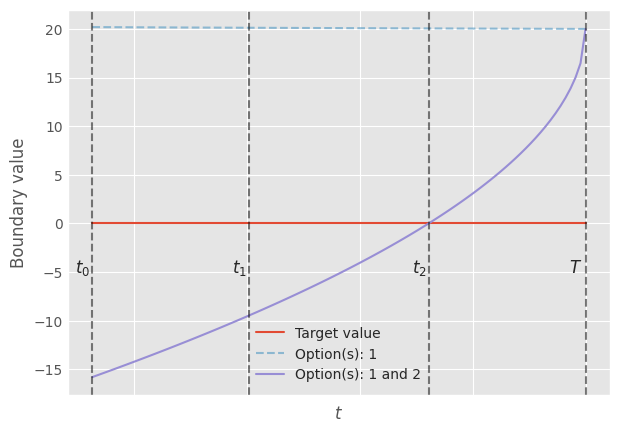

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

sor_option_parts_start = np.array([bs_factory(n_option1, options[0].strike, r, s)])

sor_option_parts_end = np.array([bs_factory(n_option1, options[0].strike, r, s), 
                                 bs_factory(n_option2, options[1].strike, r, s)])

sor_start_y = np.array([sum([sor_option_parts_start[i](120, option_tt[i, j]) for i in range(len(sor_option_parts_start))]) for j in range(len(tt))])
sor_end_y = np.array([sum([sor_option_parts_end[i](120, option_tt[i, j]) for i in range(len(sor_option_parts_end))]) for j in range(len(tt))])

ax.plot(tt, [0] * 100, label="Target value")
ax.plot(tt, sor_start_y, '--', alpha=0.5, label="Option(s): 1")
ax.plot(tt, sor_end_y, label="Option(s): 1 and 2")

ax.axvline(0, alpha=0.5, color='black', linestyle='dashed')
ax.axvline(t2.timedelta(T), alpha=0.5, color='black', linestyle='dashed')
ax.axvline(t1.timedelta(T), alpha=0.5, color='black', linestyle='dashed')
ax.axvline(t0.timedelta(T), alpha=0.5, color='black', linestyle='dashed')

ax.text(0 + 0.003, -5, "$T$", fontsize=12)
ax.text(t2.timedelta(T) + 0.003, -5, "$t_2$", fontsize=12)
ax.text(t1.timedelta(T) + 0.003, -5, "$t_1$", fontsize=12)
ax.text(t0.timedelta(T) + 0.003, -5, "$t_0$", fontsize=12)

ax.set_ylabel("Boundary value")
ax.set_xlabel("$t$")

plt.gca().axes.xaxis.set_inverted(True)
plt.gca().axes.xaxis.set_ticklabels([])

plt.legend()

fig.savefig(project_root / "figures" / "sor_parts_1.pdf")

plt.show()

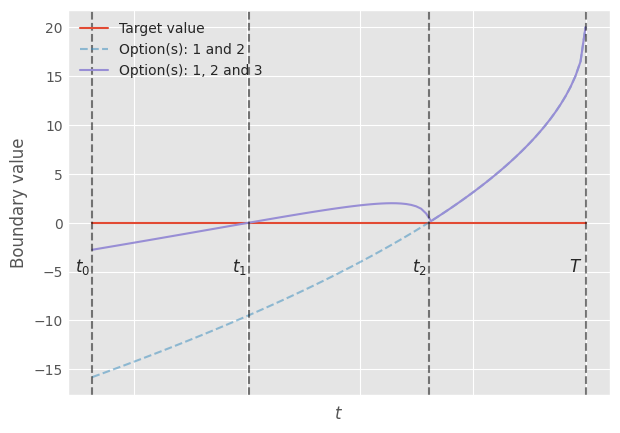

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

sor_option_parts_start = np.array([bs_factory(n_option1, options[0].strike, r, s), 
                                   bs_factory(n_option2, options[1].strike, r, s)])

sor_option_parts_end = np.array([bs_factory(n_option1, options[0].strike, r, s), 
                                 bs_factory(n_option2, options[1].strike, r, s),
                                 bs_factory(n_option3, options[2].strike, r, s)])

sor_start_y = np.array([sum([sor_option_parts_start[i](120, option_tt[i, j]) for i in range(len(sor_option_parts_start))]) for j in range(len(tt))])
sor_end_y = np.array([sum([sor_option_parts_end[i](120, option_tt[i, j]) for i in range(len(sor_option_parts_end))]) for j in range(len(tt))])

ax.plot(tt, [0] * 100, label="Target value")
ax.plot(tt, sor_start_y, '--', alpha=0.5, label="Option(s): 1 and 2")
ax.plot(tt, sor_end_y, label="Option(s): 1, 2 and 3")

ax.axvline(0, alpha=0.5, color='black', linestyle='dashed')
ax.axvline(t2.timedelta(T), alpha=0.5, color='black', linestyle='dashed')
ax.axvline(t1.timedelta(T), alpha=0.5, color='black', linestyle='dashed')
ax.axvline(t0.timedelta(T), alpha=0.5, color='black', linestyle='dashed')

ax.text(0 + 0.003, -5, "$T$", fontsize=12)
ax.text(t2.timedelta(T) + 0.003, -5, "$t_2$", fontsize=12)
ax.text(t1.timedelta(T) + 0.003, -5, "$t_1$", fontsize=12)
ax.text(t0.timedelta(T) + 0.003, -5, "$t_0$", fontsize=12)

ax.set_ylabel("Boundary value")
ax.set_xlabel("$t$")

plt.gca().axes.xaxis.set_inverted(True)
plt.gca().axes.xaxis.set_ticklabels([])

plt.legend()

fig.savefig(project_root / "figures" / "sor_parts_2.pdf")

plt.show()

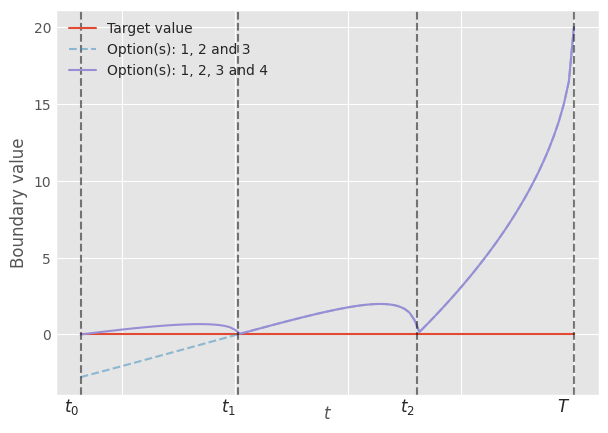

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

sor_option_parts_start = np.array([bs_factory(n_option1, options[0].strike, r, s), 
                                   bs_factory(n_option2, options[1].strike, r, s),
                                   bs_factory(n_option3, options[2].strike, r, s)])

sor_option_parts_end = np.array([bs_factory(n_option1, options[0].strike, r, s), 
                                 bs_factory(n_option2, options[1].strike, r, s),
                                 bs_factory(n_option3, options[2].strike, r, s),
                                 bs_factory(n_option4, options[3].strike, r, s)])

sor_start_y = np.array([sum([sor_option_parts_start[i](120, option_tt[i, j]) for i in range(len(sor_option_parts_start))]) for j in range(len(tt))])
sor_end_y = np.array([sum([sor_option_parts_end[i](120, option_tt[i, j]) for i in range(len(sor_option_parts_end))]) for j in range(len(tt))])

ax.plot(tt, [0] * 100, label="Target value")
ax.plot(tt, sor_start_y, '--', alpha=0.5, label="Option(s): 1, 2 and 3")
ax.plot(tt, sor_end_y, label="Option(s): 1, 2, 3 and 4")

ax.axvline(0, alpha=0.5, color='black', linestyle='dashed')
ax.axvline(t2.timedelta(T), alpha=0.5, color='black', linestyle='dashed')
ax.axvline(t1.timedelta(T), alpha=0.5, color='black', linestyle='dashed')
ax.axvline(t0.timedelta(T), alpha=0.5, color='black', linestyle='dashed')

ax.text(0 + 0.003, -5, "$T$", fontsize=12)
ax.text(t2.timedelta(T) + 0.003, -5, "$t_2$", fontsize=12)
ax.text(t1.timedelta(T) + 0.003, -5, "$t_1$", fontsize=12)
ax.text(t0.timedelta(T) + 0.003, -5, "$t_0$", fontsize=12)

ax.set_ylabel("Boundary value")
ax.set_xlabel("$t$")

plt.gca().axes.xaxis.set_inverted(True)
plt.gca().axes.xaxis.set_ticklabels([])

plt.legend()

fig.savefig(project_root / "figures" / "sor_parts_3.pdf")

plt.show()

#### Full plot

SOR solution: [1.0, -9.891690225735752, 4.3559231630046815, 1.3672434031598846]
SOR distance from target: 24.28858295612105
LSH solution: [-12.86412655   8.46458228   0.48354327]
LSH distance from target: 17.004555581593863


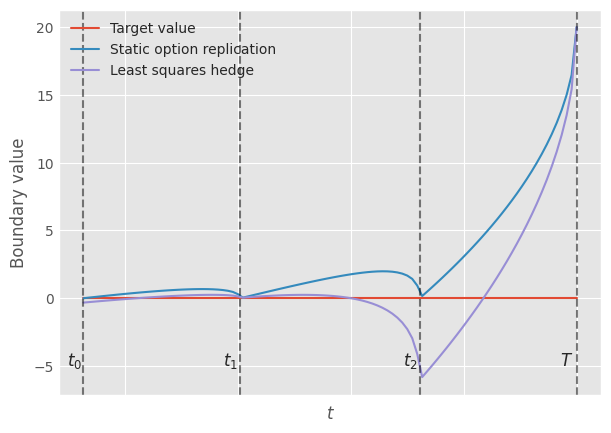

In [12]:
# Plot the results
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

sor_y = np.array([sum([sor_option_positions[i](120, option_tt[i, j]) for i in range(len(sor_option_positions))]) for j in range(len(tt))])
lsh_y = np.array([sum([lsh_option_positions[i](120, option_tt[i, j]) for i in range(len(lsh_option_positions))]) for j in range(len(tt))])

print("SOR solution:", [float(n_option1), float(n_option2), float(n_option3), float(n_option4)])
print("SOR distance from target:", 1 / len(tt) * np.linalg.norm(sor_y) ** 2)
print("LSH solution:", x)
print("LSH distance from target:", 1 / len(tt) * np.linalg.norm(lsh_y) ** 2)

ax.plot(tt, [0] * 100, label="Target value")
ax.plot(tt, sor_y, label="Static option replication")
ax.plot(tt, lsh_y, label="Least squares hedge")

ax.axvline(0, alpha=0.5, color='black', linestyle='dashed')
ax.axvline(t2.timedelta(T), alpha=0.5, color='black', linestyle='dashed')
ax.axvline(t1.timedelta(T), alpha=0.5, color='black', linestyle='dashed')
ax.axvline(t0.timedelta(T), alpha=0.5, color='black', linestyle='dashed')

ax.text(0 + 0.003, -5, "$T$", fontsize=12)
ax.text(t2.timedelta(T) + 0.003, -5, "$t_2$", fontsize=12)
ax.text(t1.timedelta(T) + 0.003, -5, "$t_1$", fontsize=12)
ax.text(t0.timedelta(T) + 0.003, -5, "$t_0$", fontsize=12)

ax.set_ylabel("Boundary value")
ax.set_xlabel("$t$")

plt.gca().axes.xaxis.set_inverted(True)
plt.gca().axes.xaxis.set_ticklabels([])

plt.legend()

fig.savefig(project_root / "figures" / "sor_lsh_comparison.pdf")

plt.show()